# Task 1

![](ex1.jpeg)

![](ex2,3.jpeg)

## Task 2

### Importaciones

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Cargar imágenes en gris

In [18]:
img1 = cv.imread("./img1.jpeg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("./img2.jpeg", cv.IMREAD_GRAYSCALE)

assert img1 is not None and img2 is not None, "Error cargando imágenes"

### SIFT: detección y descripción

In [19]:
sift = cv.SIFT_create()

kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

### ORB: detección y descripción

In [20]:
orb = cv.ORB_create(nfeatures=2000)

kp1_orb, des1_orb = orb.detectAndCompute(img1, None)
kp2_orb, des2_orb = orb.detectAndCompute(img2, None)

### Matching (Brute Force)

### BFMatcher para SIFT (L2)

In [21]:
bf_sift = cv.BFMatcher(cv.NORM_L2, crossCheck=False)
matches_sift = bf_sift.knnMatch(des1_sift, des2_sift, k=2)

### BFMatcher para ORB (Hamming)

In [22]:
bf_orb = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=False)
matches_orb = bf_orb.knnMatch(des1_orb, des2_orb, k=2)

### Lowe’s Ratio Test (CRÍTICO)

In [32]:
def ratio_test(matches, ratio=0.75):
    good = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good.append(m)
    return good

good_sift = ratio_test(matches_sift)
good_orb = ratio_test(matches_orb)

### Visualización de matches

### SIFT

In [33]:
img_sift_matches = cv.drawMatches(
    img1, kp1_sift,
    img2, kp2_sift,
    good_sift, None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

### ORB

In [34]:
img_orb_matches = cv.drawMatches(
    img1, kp1_orb,
    img2, kp2_orb,
    good_orb, None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

In [35]:
print(type(good_sift), len(good_sift) if good_sift is not None else "None")
print(type(good_orb), len(good_orb) if good_orb is not None else "None")

<class 'list'> 148
<class 'list'> 11


### Mostrar resultados

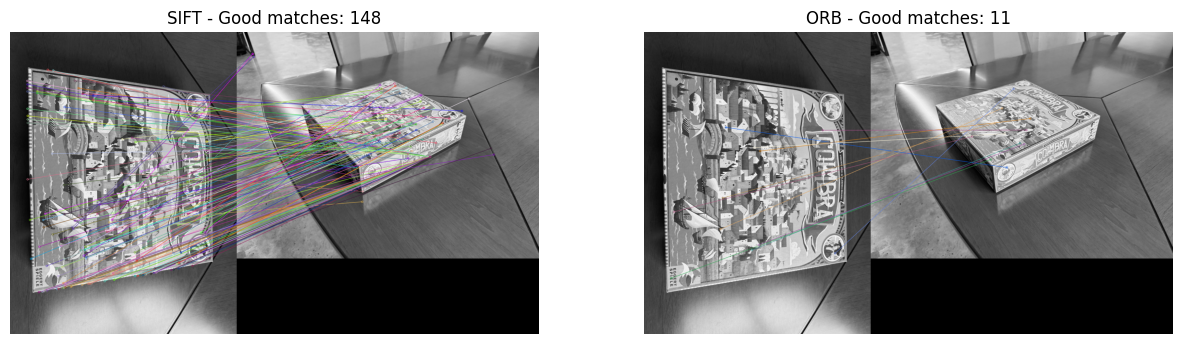

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title(f"SIFT - Good matches: {len(good_sift)}")
plt.imshow(img_sift_matches, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title(f"ORB - Good matches: {len(good_orb)}")
plt.imshow(img_orb_matches, cmap='gray')
plt.axis("off")

plt.show()